## Outlier removal - ages x net worths

---

In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

In [2]:
from os import sys

sys.path.append(".../udamini/tools/")

In [3]:
from outlier_cleaner import outlierCleaner

Load up some practice data with outliers in it

- ages é uma **lista**

- net worths idem!

In [4]:
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
#ages

In [5]:
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )
#net_worths

Ages and net_worths need to be reshaped into 2D numpy **arrays**

- second argument of reshape command is a tuple of integers: (n_rows, n_columns)

- by convention, n_rows is the number of data points and n_columns is the number of features

In [6]:
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages,  
                                                                            net_worths, test_size=0.1, random_state=42)

Fill in a regression here!

Name the regression object reg so that the plotting code below works, and you can see what your regression looks like

In [7]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)
print "Slope:", reg.coef_
print "Score:", reg.score(ages_test, net_worths_test)

Slope: [[5.07793064]]
Score: 0.8782624703664671


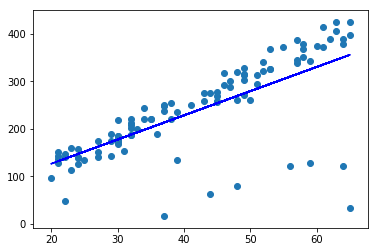

Slope: [[5.07793064]]
Score: 0.8782624703664671


In [8]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

print "Slope:", reg.coef_
print "Score:", reg.score(ages_test, net_worths_test)

Identify and remove the most outlier-y points

In [13]:
def outlierCleaner(predictions, ages, net_worths):
    cleaned_data = []

    import operator    
    errors = [a-b for a,b in zip(predictions, net_worths)]    
    data = zip(ages, net_worths, errors)
    data.sort(key=operator.itemgetter(2))
    cleaned_data = data[:int(len(predictions)*0.9)]
    print ("dados limpos :", cleaned_data)
    
    return cleaned_data

In [14]:
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

('dados limpos :', [(array([63]), array([424.51073133]), array([-79.39107925])), (array([61]), array([412.83425631]), array([-77.87046551])), (array([53]), array([368.29556369]), array([-73.95521804])), (array([57]), array([385.56297538]), array([-70.91090716])), (array([65]), array([424.55804235]), array([-69.28252898])), (array([55]), array([370.87480057]), array([-66.37859364])), (array([58]), array([378.75051645]), array([-59.02051758])), (array([46]), array([317.05788089]), array([-58.26304975])), (array([49]), array([326.86999045]), array([-52.84136738])), (array([52]), array([339.7693316]), array([-50.5069166])), (array([48]), array([318.62560238]), array([-49.67490995])), (array([62]), array([389.24094136]), array([-49.19921993])), (array([58]), array([366.6772719]), array([-46.94727303])), (array([34]), array([243.79287312]), array([-45.93320969])), (array([60]), array([374.28347922]), array([-44.39761907])), (array([65]), array([396.66651524]), array([-41.39100187])), (array(

Only run this code if cleaned_data is returning data

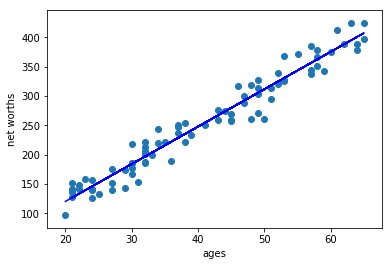

Slope: [[6.36859481]]
Score: 0.983189455395532


In [16]:
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
    
    print "Slope:", reg.coef_
    print "Score:", reg.score(ages_test, net_worths_test)

else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"